In [1]:
from google.colab import files 


uploaded = files.upload()


Saving DSA Data Set.csv to DSA Data Set.csv


In [2]:
import pandas as pd 
import io 

data = pd.read_csv(io.BytesIO(uploaded['DSA Data Set.csv'])) 
print(data)


       age          job  marital  ... nr.employed ModelPrediction    y
0       56    housemaid  married  ...      5191.0        0.932750   no
1       57     services  married  ...      5191.0        0.953579   no
2       37     services  married  ...      5191.0        0.945724   no
3       40       admin.  married  ...      5191.0        0.933875   no
4       56     services  married  ...      5191.0        0.940996   no
...    ...          ...      ...  ...         ...             ...  ...
41183   73      retired  married  ...      4963.6        0.567417  yes
41184   46  blue-collar  married  ...      4963.6        0.655416   no
41185   56      retired  married  ...      4963.6        0.574102   no
41186   44   technician  married  ...      4963.6        0.615098  yes
41187   74      retired  married  ...      4963.6        0.631597   no

[41188 rows x 22 columns]


In [3]:
# Import the libraries
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [6]:
print(data["job"].value_counts())
print("*"*25)
print(data["marital"].value_counts())
print("*"*25)
print(data["education"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*************************
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
*************************
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [7]:
print(data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


**EDA**

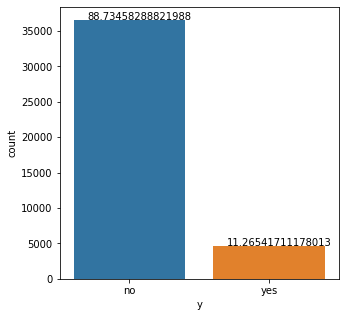

In [8]:
plt.figure(figsize=(5,5))
Y = data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=data)
for p in ax.patches:
    ax.annotate(format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()


In [9]:
def countplot(label, dataset):
  plt.figure(figsize=(20,8))
  X = data[label]
  total = len(X)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate(format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5)) 
  

In [10]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(15,8))
  X = data[label]
  total = len(X)*1.
  ax=sns.countplot(x=label, data=dataset,hue="y")
  for p in ax.patches:
    ax.annotate(format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
 


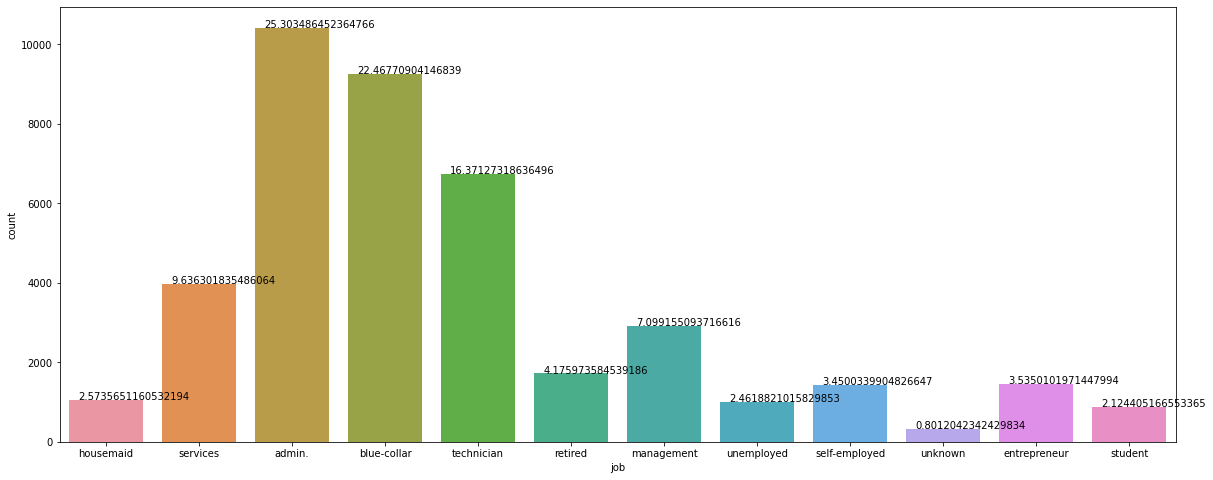

In [11]:
countplot("job", data)

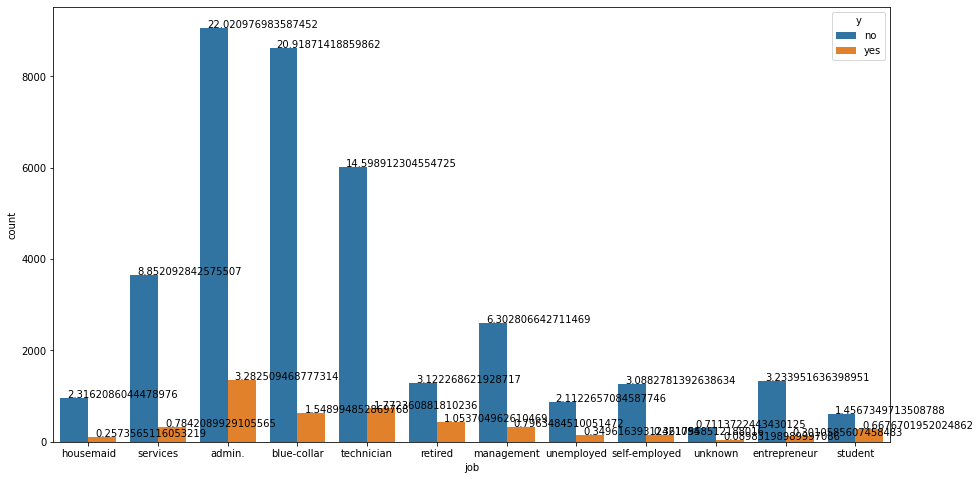

In [12]:
countplot_withY("job", data)

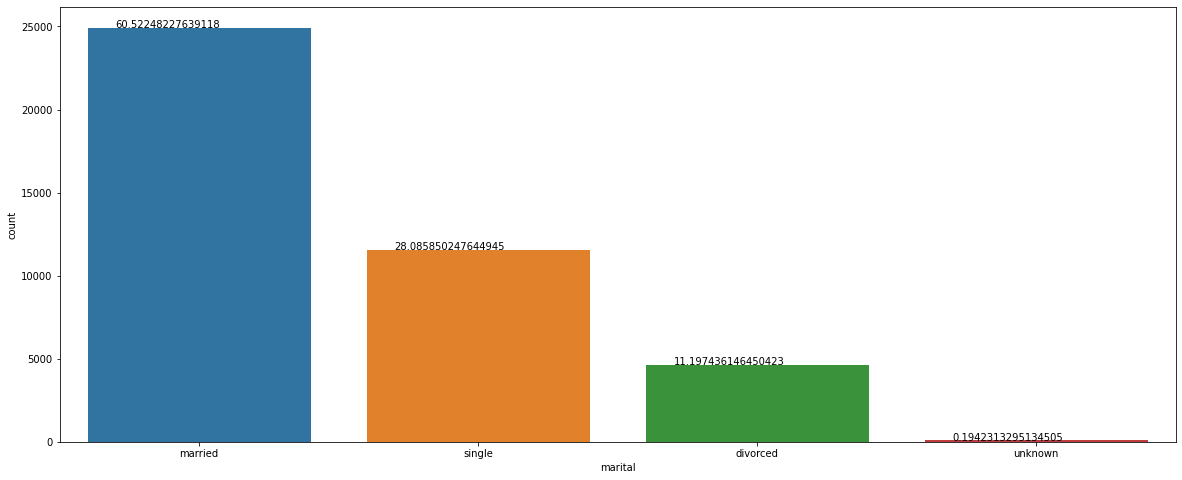

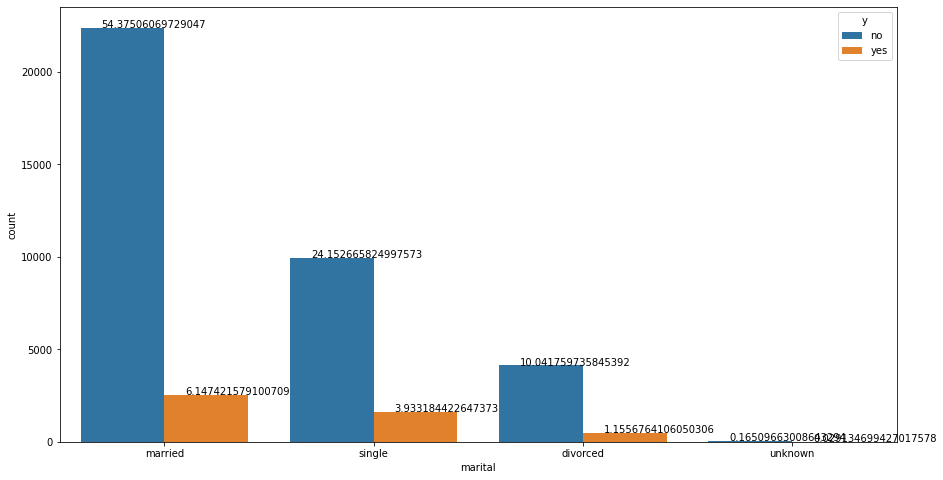

In [13]:
countplot("marital", data)
countplot_withY("marital", data)

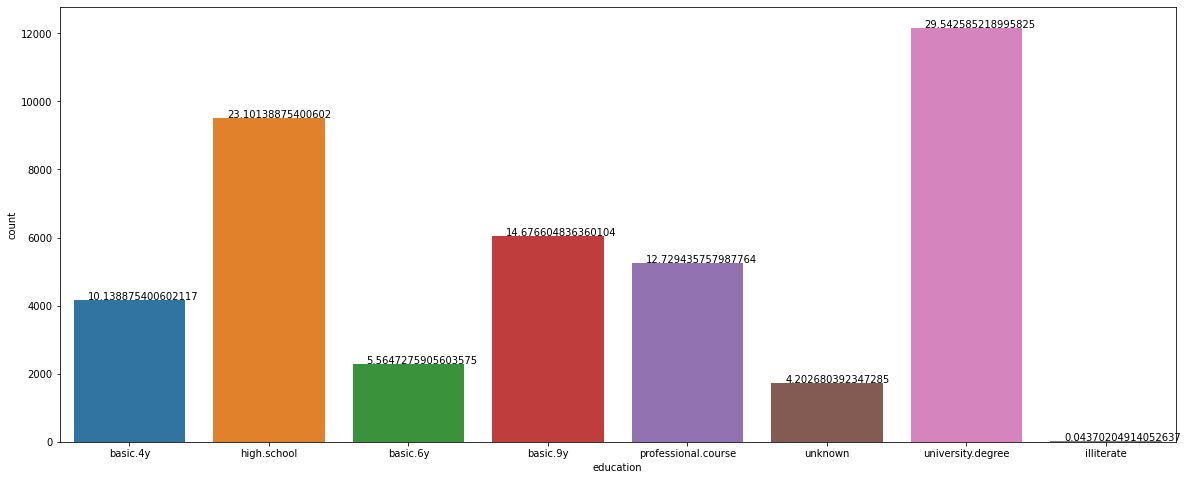

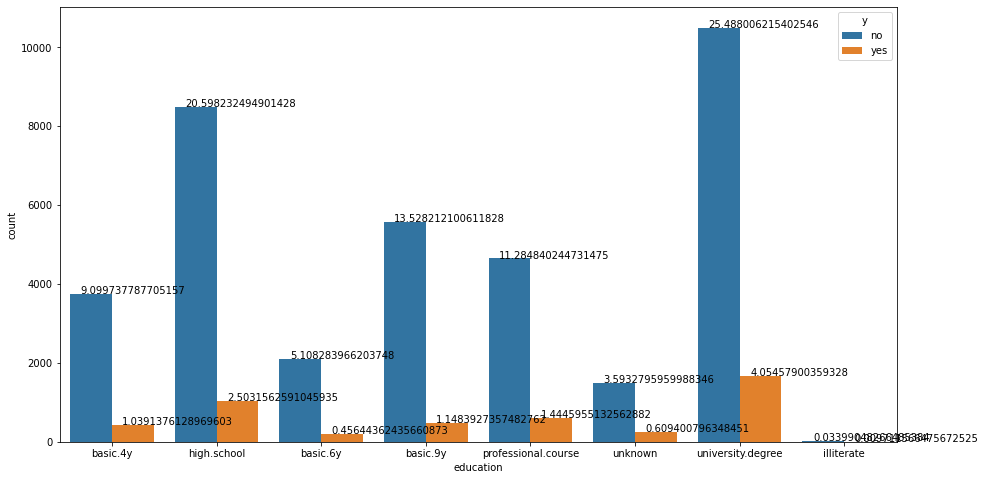

In [14]:
countplot("education",data)
countplot_withY("education",data)

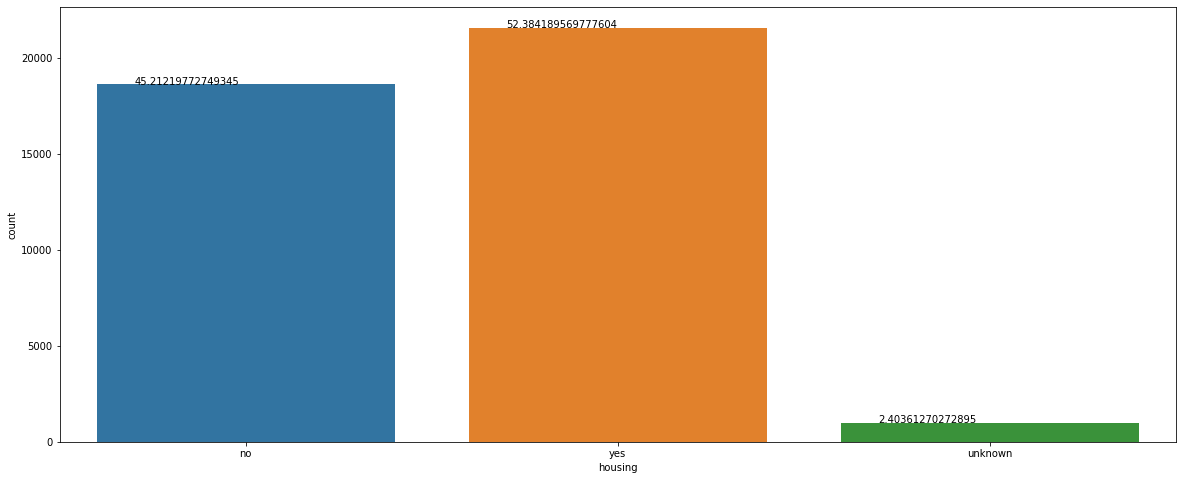

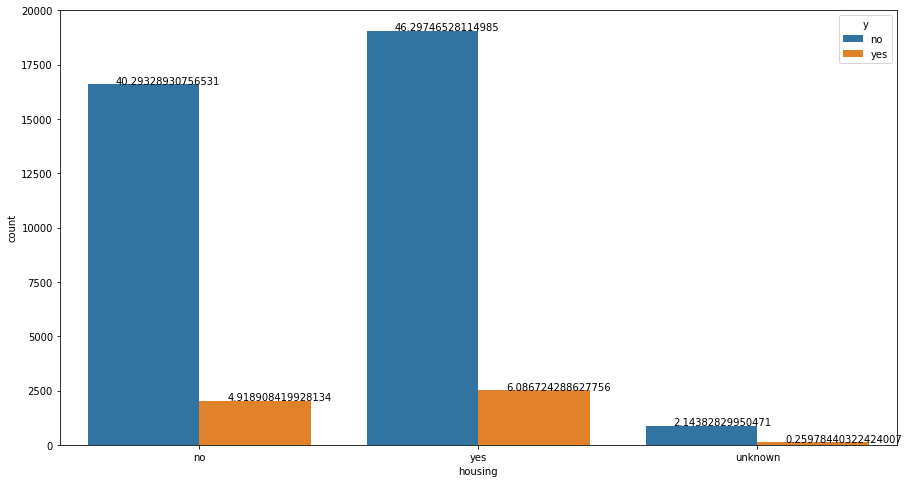

In [15]:
countplot("housing", data)
countplot_withY("housing", data)

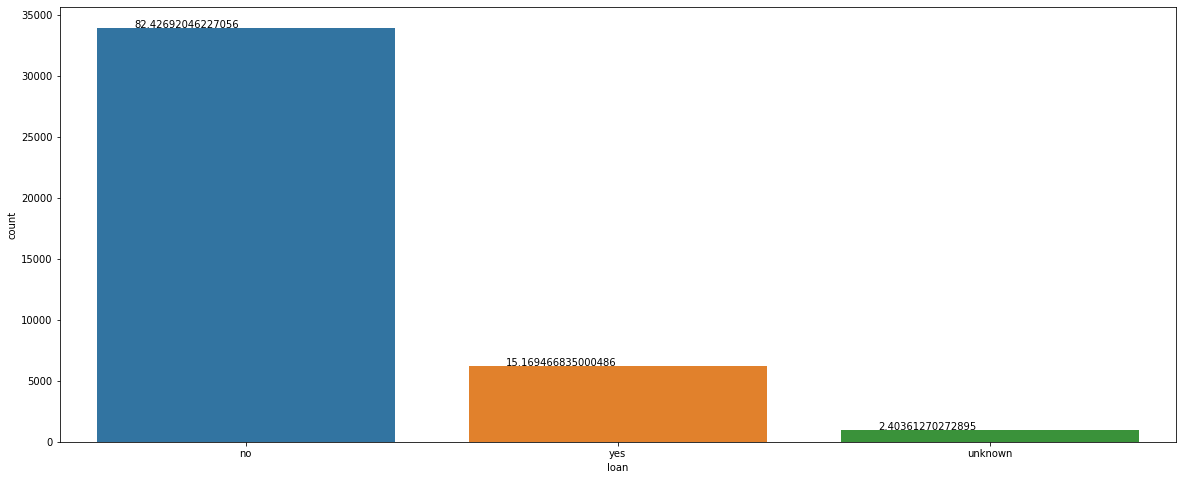

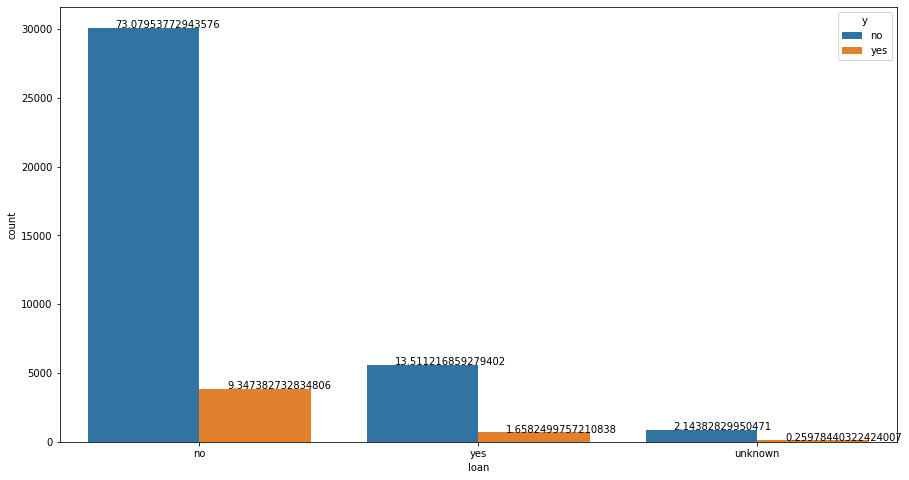

In [16]:
countplot("loan", data)
countplot_withY("loan", data)

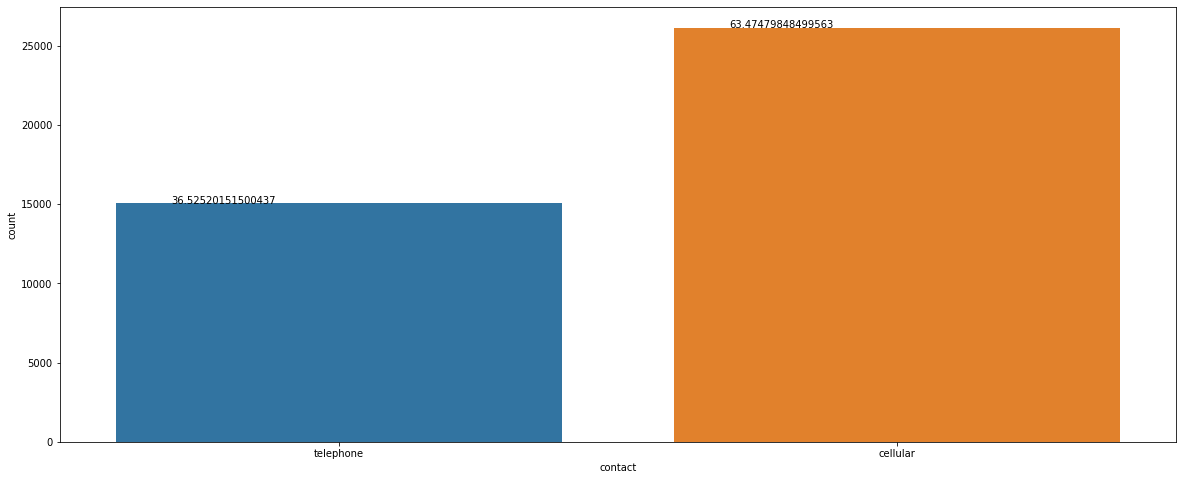

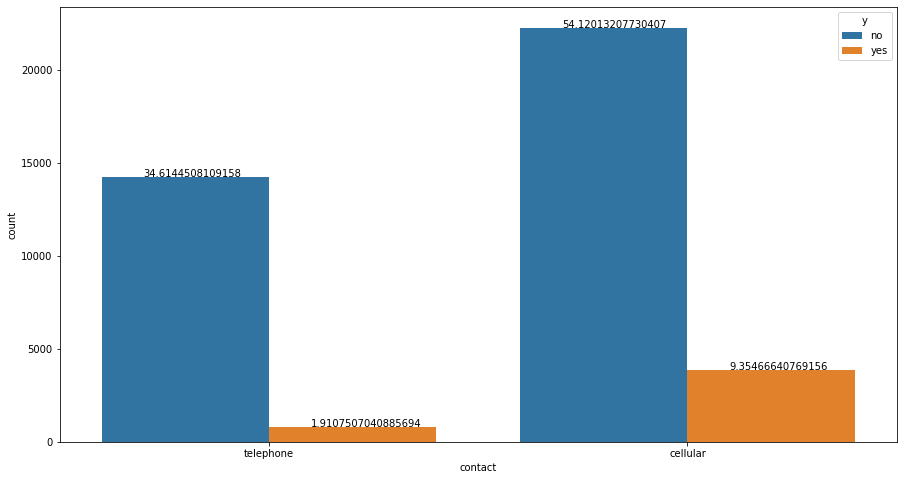

In [17]:
countplot("contact", data)
countplot_withY("contact",data)

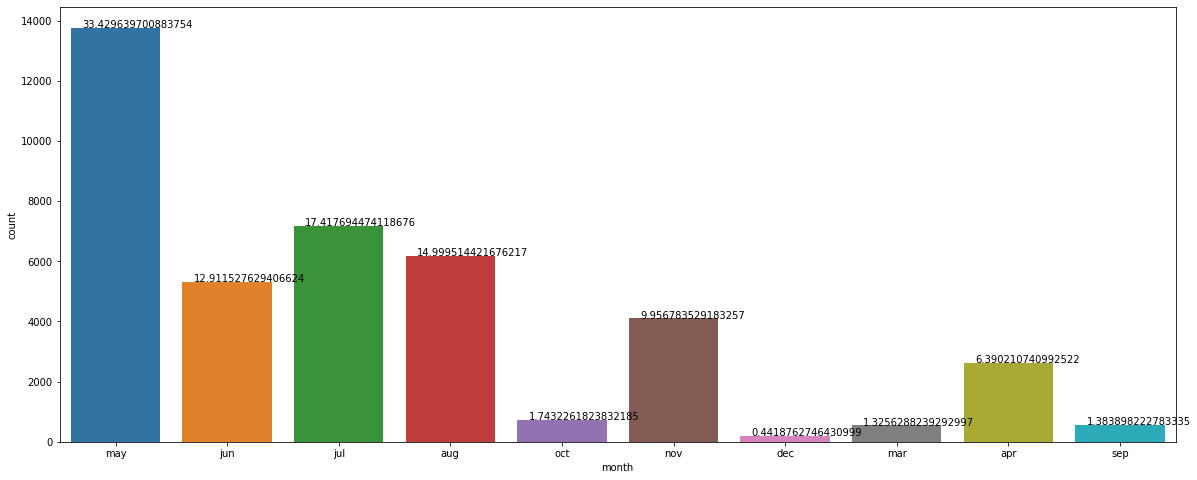

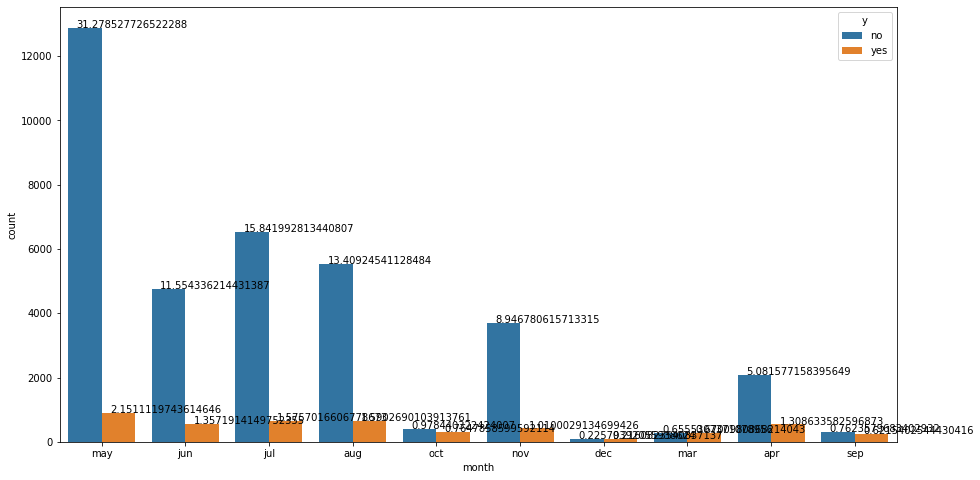

In [18]:
countplot("month", data)
countplot_withY("month",data)

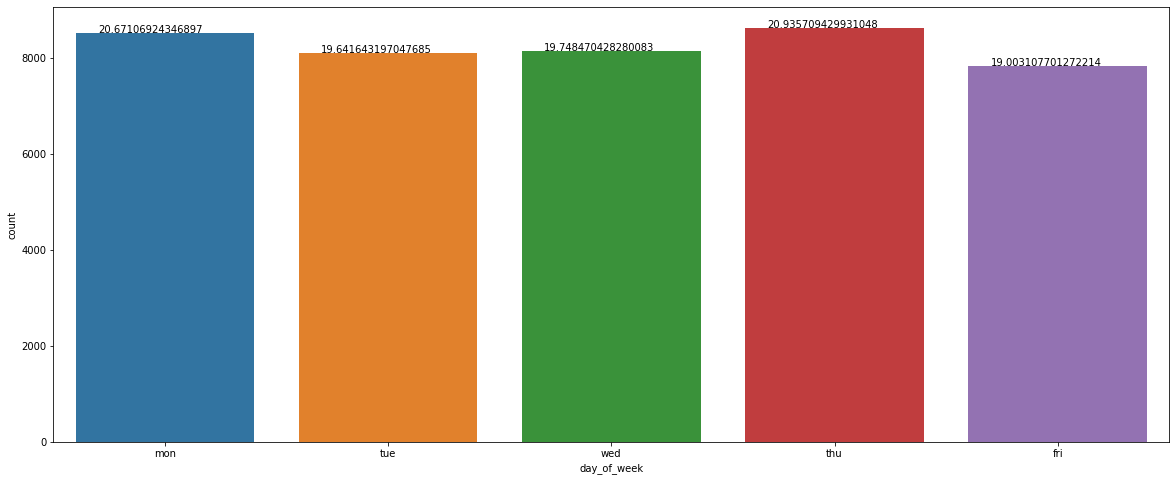

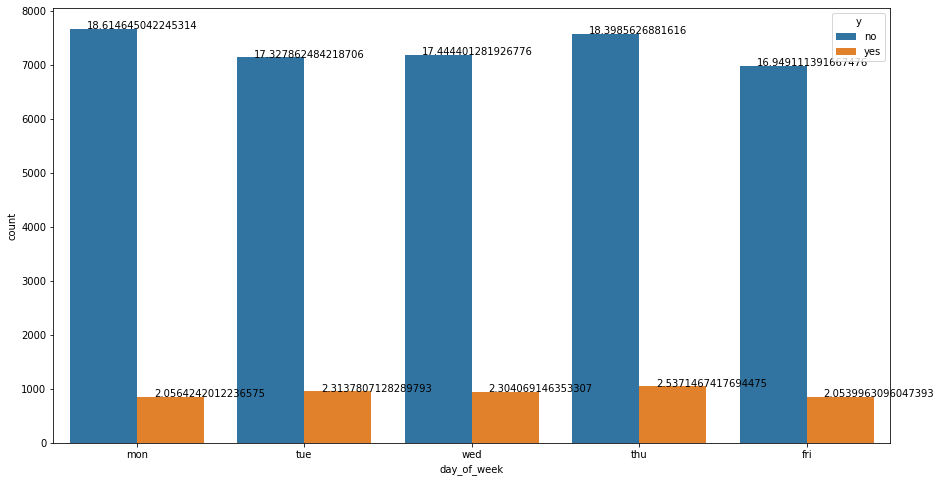

In [19]:
countplot("day_of_week", data)
countplot_withY("day_of_week", data)

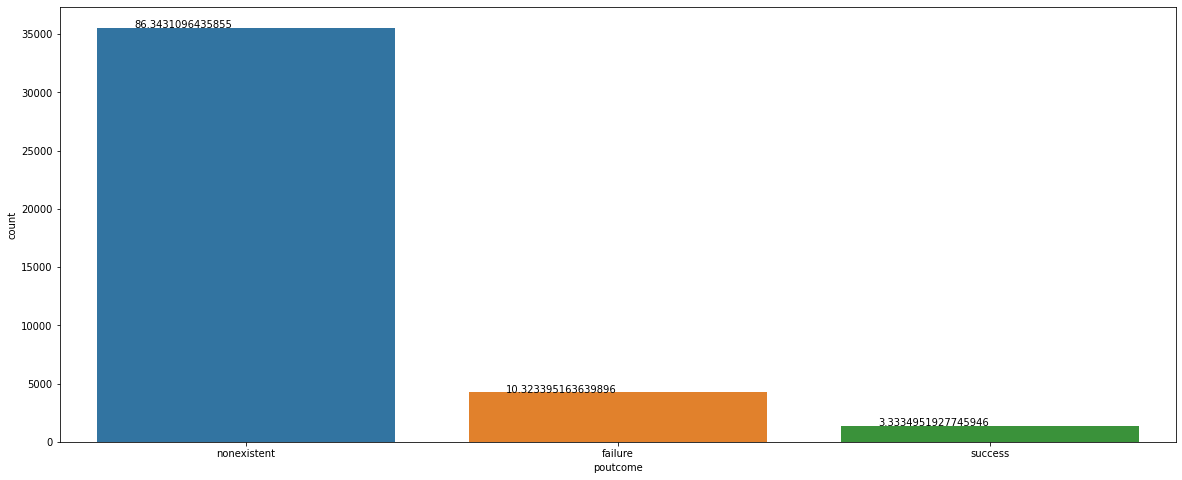

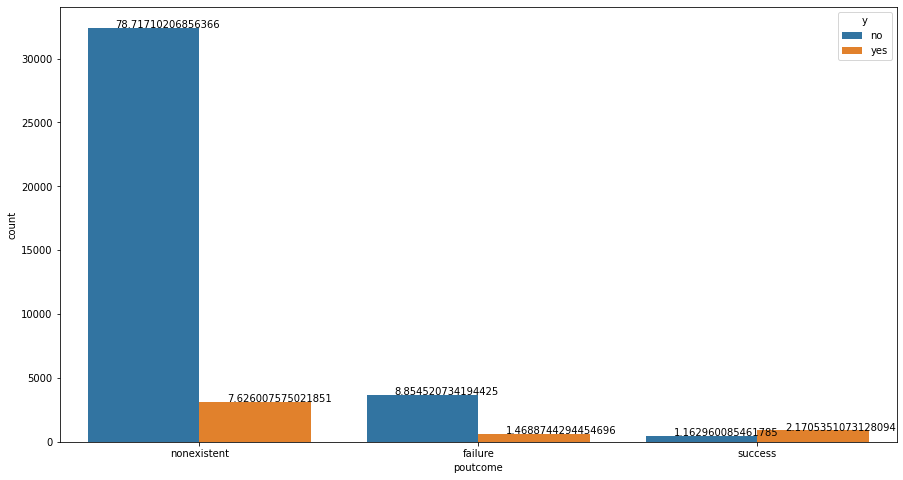

In [20]:
countplot("poutcome", data)
countplot_withY("poutcome", data)

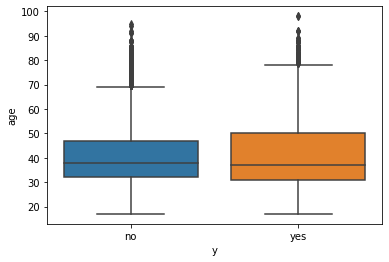

In [21]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


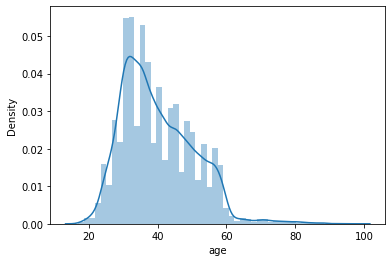

In [22]:
sns.distplot(data["age"])
plt.show()

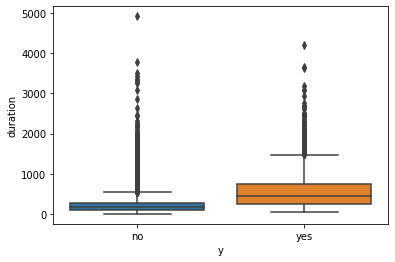

In [23]:
sns.boxplot(data=data, x='y', y='duration')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


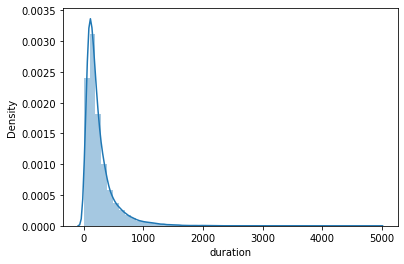

In [24]:
sns.distplot(data["duration"])
plt.show()

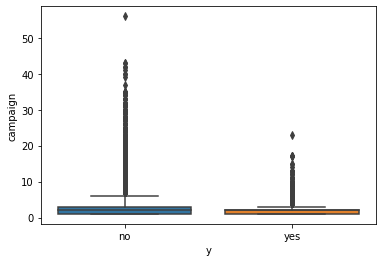

In [25]:
sns.boxplot(data=data, x='y', y="campaign")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


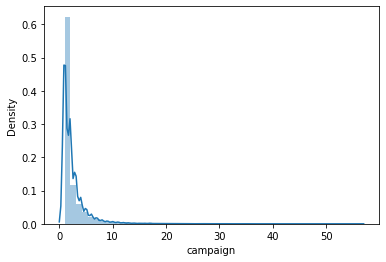

In [26]:
sns.distplot(data["campaign"])
plt.show()

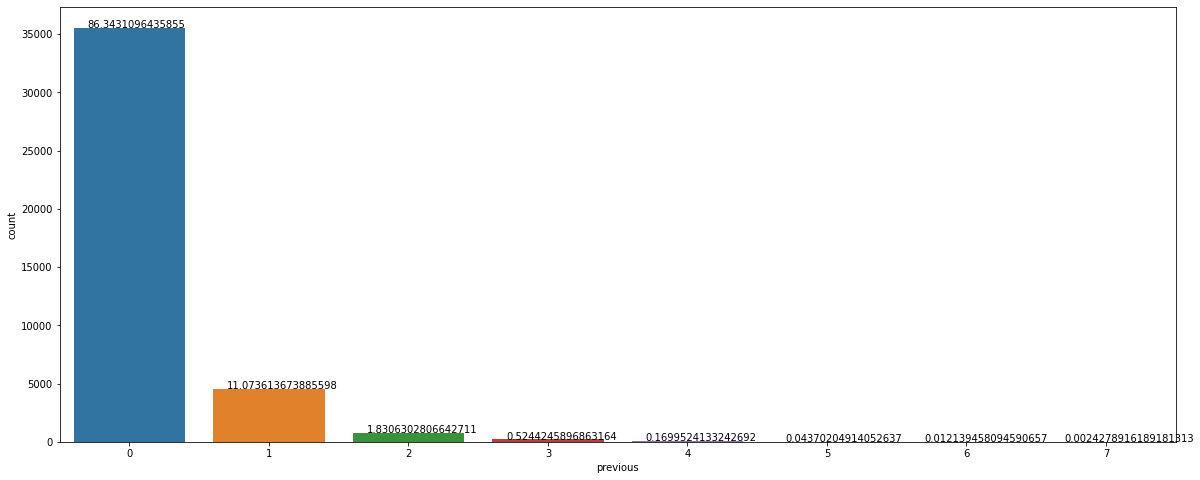

In [27]:
countplot("previous", data)

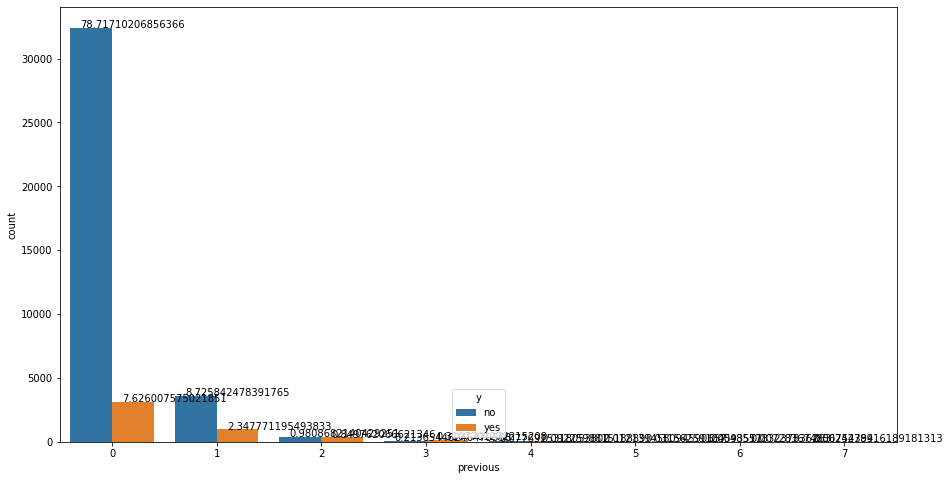

In [28]:
countplot_withY("previous",data)

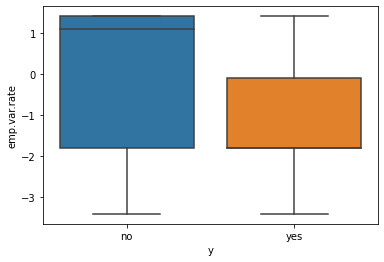

In [29]:
sns.boxplot(data=data, x="y", y= "emp.var.rate")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


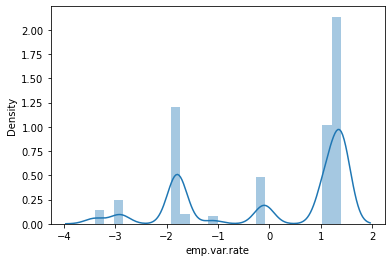

In [30]:
sns.distplot(data["emp.var.rate"])
plt.show()

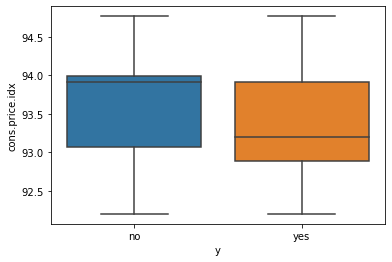

In [31]:
sns.boxplot(data=data, x="y", y="cons.price.idx")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


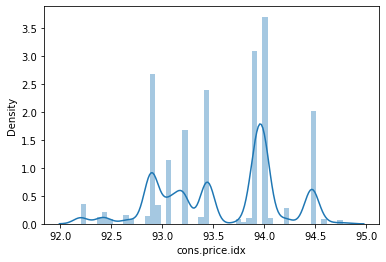

In [32]:
sns.distplot(data["cons.price.idx"])
plt.show()

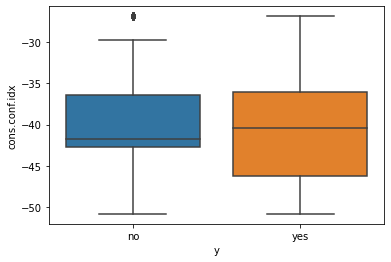

In [33]:
sns.boxplot(data= data, x="y",y="cons.conf.idx")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


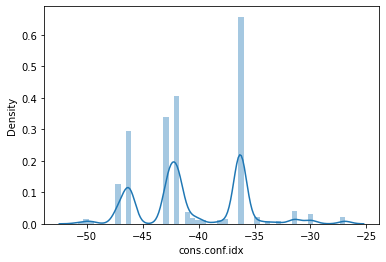

In [34]:
sns.distplot(data["cons.conf.idx"])
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

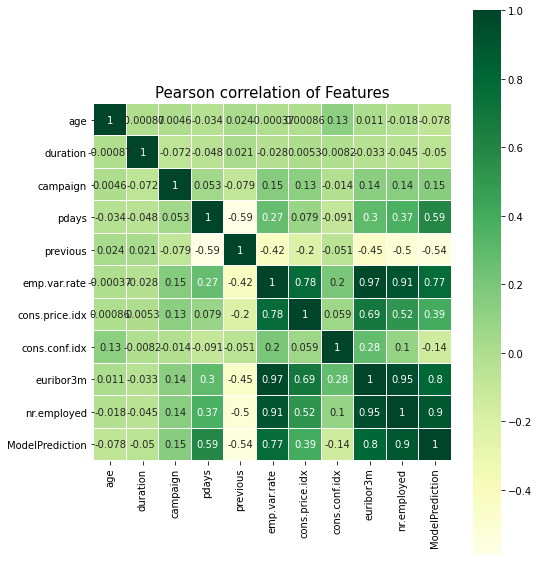

In [35]:
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(8,10))
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features",y=1.05, size=15)

In [36]:
data_duplicate = data[data.duplicated(keep="last")]
data_duplicate

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0.945200,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0.956465,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.956728,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.961048,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.955202,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.970002,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0.956788,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0.932301,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0.842341,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.827244,no


In [37]:
data_duplicate.shape

(12, 22)

In [38]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (41188, 21)
Shape of Y: (41188,)


In [39]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26360, 21)
X CV: (6590, 21)
X Test: (8238, 21)
Y Train: (26360,)
Y CV: (6590,)
Y Test: (8238,)


In [40]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [41]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [42]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)
  


In [44]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26360, 64)
Shape of CV:  (6590, 64)
Shape of test:  (8238, 64)


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26360 entries, 12586 to 12856
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            26360 non-null  int64  
 1   duration                       26360 non-null  int64  
 2   campaign                       26360 non-null  int64  
 3   pdays                          26360 non-null  int64  
 4   previous                       26360 non-null  int64  
 5   emp.var.rate                   26360 non-null  float64
 6   cons.price.idx                 26360 non-null  float64
 7   cons.conf.idx                  26360 non-null  float64
 8   euribor3m                      26360 non-null  float64
 9   nr.employed                    26360 non-null  float64
 10  ModelPrediction                26360 non-null  float64
 11  job_admin.                     26360 non-null  int64  
 12  job_blue-collar                26360 non-n

In [46]:
data_x.to_csv("encoded_data_x.csv")
data_y.to_csv("data_y.csv")

In [47]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

AUC for k =  1 is 0.7799161550961451
AUC for k =  3 is 0.8586696533357407
AUC for k =  5 is 0.891240859438476
AUC for k =  7 is 0.9034340299720143
AUC for k =  9 is 0.9099995486142458
AUC for k =  11 is 0.915362011374921
AUC for k =  13 is 0.9192988850771869
AUC for k =  15 is 0.9211626568565496


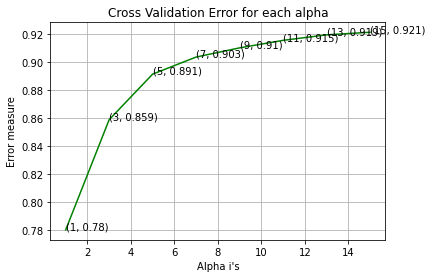

For values of best alpha =  15 The train AUC is: 0.949274670625978
For values of best alpha =  15 The cross validation AUC is: 0.9211626568565496
For values of best alpha =  15 The test AUC is: 0.92514012376995


In [48]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

AUC for number of estimators =  10 is 0.9311077006409677
AUC for number of estimators =  50 is 0.9382961316240859
AUC for number of estimators =  100 is 0.9387004604134693
AUC for number of estimators =  500 is 0.9401970298817369
AUC for number of estimators =  1000 is 0.939930825133159
AUC for number of estimators =  2000 is 0.9399720140832356
AUC for number of estimators =  3000 is 0.9399826216484608


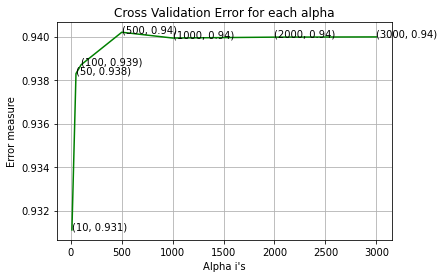

For values of best alpha =  500 The train AUC is: 1.0
For values of best alpha =  500 The cross validation AUC is: 0.9401970298817369
For values of best alpha =  500 The test AUC is: 0.945908123168683


In [49]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

In [50]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26360, 21)
X CV: (6590, 21)
X Test: (8238, 21)
Y Train: (26360,)
Y CV: (6590,)
Y Test: (8238,)


In [51]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [52]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
30180,41,management,married,basic.6y,no,no,no,cellular,apr,thu,281,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,0.827927
3483,27,technician,single,professional.course,no,no,no,telephone,may,thu,124,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0.930768
22881,31,technician,married,university.degree,no,yes,no,cellular,aug,mon,111,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.957472
3480,50,retired,married,basic.4y,unknown,yes,no,telephone,may,thu,855,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0.949730
17886,36,housemaid,married,basic.4y,no,yes,no,cellular,jul,tue,665,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0.964522


In [53]:
categorical_feature_mask = data_x.dtypes==object
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [54]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [55]:
def get_fea_dict(alpha, feature, train_df, train_df_y):
   
    value_count = train_df[feature].value_counts()
    feat_dict = dict()
    
    for i, denominator in value_count.items():
        vec = []
        for k in range(0, 2):
            cls_cnt = train_df.loc[(train_df_y==k) & (train_df[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))
        feat_dict[i]=vec
    return feat_dict

# Get Response coded feature
def get_response_feature(alpha, feature, train_df, train_df_y):

    feat_dict = get_fea_dict(alpha, feature, train_df, train_df_y)
    value_count = train_df[feature].value_counts()

    res_fea = []
    for index, row in train_df.iterrows():
        if row[feature] in dict(value_count).keys():
            res_fea.append(feat_dict[row[feature]])
        else:
            res_fea.append([1/2, 1/2])
    return res_fea

In [56]:
def ResponseEncoder(categorical_cols, x_df, y_df):

  print("Encoding Train dataset")
  print("Shape of the train dataset before encoding: ", X_train.shape)
  for i in (categorical_cols):
    temp_response_coded_feature = np.array(get_response_feature(alpha=1, feature=i, train_df=x_df, train_df_y=y_df))
    df_response = pd.DataFrame(temp_response_coded_feature, columns=[i+"_0", i+"_1"])
    x_df = pd.concat([x_df, df_response], axis=1)
  
  x_df = x_df.drop(categorical_cols, axis=1)
  return x_df

In [57]:
# Reset index so that pd.concat works properly in ResponseEncoder function
X_train = X_train.reset_index().drop("index",axis=1)
X_test = X_test.reset_index().drop("index",axis=1)
X_cv = X_cv.reset_index().drop("index",axis=1)

In [58]:
X_train = ResponseEncoder(categorical_cols, X_train, y_train)
print("Shape of the train dataset after encoding: ", X_train.shape)

X_cv = ResponseEncoder(categorical_cols, X_cv, y_cv)
print("Shape of the cv dataset after encoding: ", X_cv.shape)

X_test = ResponseEncoder(categorical_cols, X_test, y_test)
print("Shape of the test dataset after encoding: ", X_test.shape)

Encoding Train dataset
Shape of the train dataset before encoding:  (26360, 21)
Shape of the train dataset after encoding:  (26360, 31)
Encoding Train dataset
Shape of the train dataset before encoding:  (26360, 31)
Shape of the cv dataset after encoding:  (6590, 31)
Encoding Train dataset
Shape of the train dataset before encoding:  (26360, 31)
Shape of the test dataset after encoding:  (8238, 31)


In [59]:
X_train = X_train.drop("duration", axis=1)
X_cv = X_cv.drop("duration", axis=1)
X_test = X_test.drop("duration", axis=1)
X_train.to_csv("Response_coded_features_train.csv")
X_cv.to_csv("Response_coded_features_cv.csv")
X_test.to_csv("Response_coded_features_test.csv")

AUC for k =  1 is 0.6774337338168815
AUC for k =  3 is 0.7446091711275431
AUC for k =  5 is 0.7587180499907705
AUC for k =  7 is 0.7634964132020224
AUC for k =  9 is 0.7647879635963531
AUC for k =  11 is 0.7683704635692079
AUC for k =  13 is 0.7679106901781094
AUC for k =  15 is 0.7683173040381337


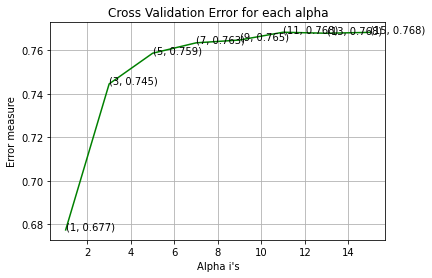

For values of best alpha =  11 The train AUC is: 0.8815660865069593
For values of best alpha =  11 The cross validation AUC is: 0.7683704635692079
For values of best alpha =  11 The test AUC is: 0.7400618281827345


In [60]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

AUC for number of estimators =  10 is 0.7597013882102566
AUC for number of estimators =  50 is 0.7405226735579516
AUC for number of estimators =  100 is 0.7623662641924638
AUC for number of estimators =  500 is 0.7775953387913468
AUC for number of estimators =  1000 is 0.7786874843914569
AUC for number of estimators =  2000 is 0.7798649114520559
AUC for number of estimators =  3000 is 0.7815326503577749


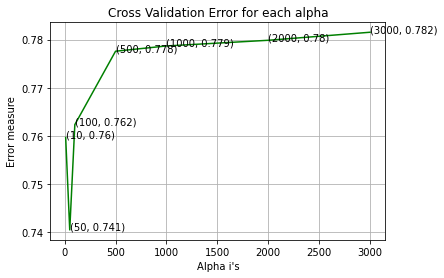

For values of best alpha =  3000 The train AUC is: 0.9997345097197007
For values of best alpha =  3000 The cross validation AUC is: 0.7815326503577749
For values of best alpha =  3000 The test AUC is: 0.7504971147847785


In [61]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))